In [1]:
import networkx as nx

In [2]:
H = nx.read_gml("polblogs.gml")

In [3]:
H2 = nx.Graph(H)
H3 = nx.to_undirected(H2)
    

In [4]:
for node in H3.nodes:
    print(node)
    for neighbor in H3[node]:
        print ("\t" + neighbor)
    break

100monkeystyping.com
	rudepundit.blogspot.com
	townhall.com/clog
	tbogg.blogspot.com
	americablog.blogspot.com
	powerlineblog.com
	oliverwillis.com
	mydd.com
	talkleft.com
	lightupthedarkness.org
	blogforamerica.com
	dailykos.com
	juancole.com
	atrios.blogspot.com
	theleftcoaster.com
	talkingpointsmemo.com
	12thharmonic.com/wordpress
	althippo.blogspot.com
	beastsbelly.blogspot.com
	burntorangereport.com
	dogfight04.typepad.com
	goose3five.blogspot.com
	hereswhatsleft.typepad.com
	hereswhatsleft.typepad.com/home
	peacegarden.blogspot.com
	robschumacher.blogspot.com
	markheimonen.blogspot.com


In [5]:
H3[node]

AtlasView({'rudepundit.blogspot.com': {}, 'townhall.com/clog': {}, 'tbogg.blogspot.com': {}, 'americablog.blogspot.com': {}, 'powerlineblog.com': {}, 'oliverwillis.com': {}, 'mydd.com': {}, 'talkleft.com': {}, 'lightupthedarkness.org': {}, 'blogforamerica.com': {}, 'dailykos.com': {}, 'juancole.com': {}, 'atrios.blogspot.com': {}, 'theleftcoaster.com': {}, 'talkingpointsmemo.com': {}, '12thharmonic.com/wordpress': {}, 'althippo.blogspot.com': {}, 'beastsbelly.blogspot.com': {}, 'burntorangereport.com': {}, 'dogfight04.typepad.com': {}, 'goose3five.blogspot.com': {}, 'hereswhatsleft.typepad.com': {}, 'hereswhatsleft.typepad.com/home': {}, 'peacegarden.blogspot.com': {}, 'robschumacher.blogspot.com': {}, 'markheimonen.blogspot.com': {}})

# Applying my model

In [6]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import netwulf as nw
from scipy.optimize import minimize

In [7]:
def bound(num, upper=1, lower = 0):
    return min(max(num, lower), 1)

def create_func_2param(params):
    return lambda x,y: bound(sum([params[i]*x**i for i in range(len(params))])*sum([params[i]*y**i for i in range(len(params))]))

def create_func_1param(params):
    return lambda x: bound(sum([params[i]*x**i for i in range(len(params))]))

In [8]:
#labels is a column numpy array
def t_matrix_func1(labels, params=[0]):
    return labels @ labels.T + params[0]
def t_matrix_func2(labels, params=[0,1]):
    return labels @ labels.T*params[1] + params[0]
def t_matrix_func3(labels, params=[0,1, 1]):
    return (labels @ labels.T)**2*params[2]+ labels @ labels.T*params[1] + params[0]

In [37]:
def log_likelihood(G, G_c, labels, params, transition_func):
    n = len(labels)
    vec = np.zeros(n).reshape(-1, 1)
    labels = np.array(labels).reshape(-1,1)
    #for i in range(len(params)):
    #    vec += labels**i*params[i]
    transition_predictions = transition_func(labels, params)
    transition_predictions = np.clip(transition_predictions, .0001, .9999)
    prod = transition_predictions*G + (1-transition_predictions)*G_c
    log_matrix = np.log(prod + np.identity(n))
    return np.sum(log_matrix)/(n*(n-1))

def find_opt_params(g, transition_func, num_params = 1):
    labels = len(g.nodes)
    G_c = nx.to_numpy_array(nx.complement(g))
    G = nx.to_numpy_array(g)
    func = lambda x: -log_likelihood(G,G_c, x[:-num_params], x[-num_params:], transition_func)
    bounds = [(0,1) for i in range(labels)] + [(None, None) for i in range(1)]
    res = minimize(func, list(np.random.rand(labels + num_params)),
                    method='Nelder-Mead', options={'maxiter': 1000, 'disp': True})
    return res.x

In [38]:
def prob_matrix(labels, params, transition_func):
    n = len(labels)
    vec = np.zeros(n).reshape(-1, 1)
    labels = np.array(labels).reshape(-1,1)
    #for i in range(len(params)):
    #    vec += labels**i*params[i]
    transition_predictions = transition_func(labels,params)
    transition_predictions = np.clip(transition_predictions, .0001, .999)
    return transition_predictions

In [81]:
G = nx.read_gml("polblogs.gml")
G = nx.Graph(G)
G = nx.to_undirected(G)

In [40]:
l = find_opt_params(G,t_matrix_func1, num_params=1)

In [43]:
np.round(prob_matrix(l[:-1], l[-1:], t_matrix_func1))

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
prob_matrix(l[:-1], l[-1:], t_matrix_func1)

array([[0.95064653, 0.74960974, 0.99020702, ..., 0.99343056, 0.999     ,
        0.39370849],
       [0.74960974, 0.61422123, 0.7762518 , ..., 0.7784227 , 0.85750487,
        0.37453905],
       [0.99020702, 0.7762518 , 0.999     , ..., 0.999     , 0.999     ,
        0.3974807 ],
       ...,
       [0.99343056, 0.7784227 , 0.999     , ..., 0.999     , 0.999     ,
        0.39778807],
       [0.999     , 0.85750487, 0.999     , ..., 0.999     , 0.999     ,
        0.40898519],
       [0.39370849, 0.37453905, 0.3974807 , ..., 0.39778807, 0.40898519,
        0.34060282]])

In [82]:
nx.to_numpy_array(G)

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

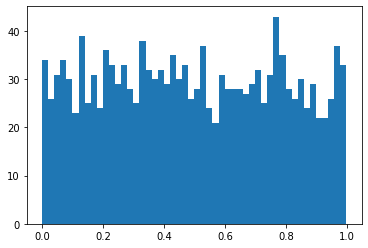

In [46]:
plt.hist(l[:-1], bins=50)
plt.show()

In [48]:
np.shape(G_)

(1490, 1490)

In [24]:
labels = len(G.nodes)
G_c = nx.to_numpy_array(nx.complement(G))
G_ = nx.to_numpy_array(G)

In [55]:
log_likelihood(G_, G_c, list(np.random.rand(labels)), list(np.random.rand(2)),t_matrix_func1)

-0.41573021582726394

In [54]:
log_likelihood_optimized(G_, G_c, list(np.random.rand(labels)), list(np.random.rand(2)))

-0.3475921603989062

In [41]:
-log_likelihood(G_, G_c, l[:-1], l[1:],t_matrix_func1)

2.6201350581002845

In [35]:
-log_likelihood(G_, G_c, np.random.rand(len(l[:-1])), np.random.rand(1),t_matrix_func1)

5.566851965866219

In [42]:
for i in range(100):
    print(-log_likelihood(G_, G_c, np.random.rand(len(l[:-1])), np.random.rand(1),t_matrix_func1))

0.8156675685654552
0.5465971674738475
4.9463351896906795
5.797757951907461
0.615405138524815
5.074521498525194
6.469729291722628
1.6120977125254456
8.023318044249775
6.427070139967161
0.7749519302728733
0.44870831277047835
5.66385336587268
2.708638124378002
3.459965767582128
6.235521950015014
3.5173876385704945
1.207129913793597
7.638122673338078
2.616647277049485
7.810229715465868
1.0637306520676277
1.7457543122951809
6.804301204220381
7.539706579262491
3.279715976781961
7.760332259790705
3.3824769577030396
1.725217981303893
6.857064981474689
7.943830601084695
3.4115089297896426
0.5245592811606041
0.6532254730751278
0.6058738036542582
2.157621229061039
1.593228670789813
2.26720268393173
6.9227226734952305
7.742407169654096
2.0409640457744684
5.316298738290315
0.9109655300166372
4.528260878345366
0.9721726110682104
6.546704197526951
4.2916513871059205
1.1345808011084522
0.4459903049664393
0.8747839354307929
4.807906178883874
2.162967745802004
4.492287457315515
2.6403345053586973
0.3869

In [94]:
def find_opt_params_seeded(g, transition_func, num_params = 1):
    labels = len(g.nodes)
    G_c = nx.to_numpy_array(nx.complement(g))
    G_ = nx.to_numpy_array(g)
    func = lambda x: -log_likelihood(G_,G_c, x[:-num_params], x[-num_params:], transition_func)
    min_val = 10000
    xlabels = []
    for i in range(100):
        vals = np.random.rand(labels + num_params)
        if func(vals) < min_val:
            xlabels = vals
            min_val = func(vals)
            print("min val is", min_val)
            print("labels", xlabels)
    print("min val is", min_val)
    print("labels", xlabels)
    res = minimize(func, xlabels,
                    method='Nelder-Mead', options={'maxiter': 2000, 'disp': True, 'adaptive':True})
    print("i have no idea why but", func(res.x))
    return res.x, xlabels

In [95]:
-log_likelihood(G_, G_c, labels[:-1], labels[-1:],t_matrix_func1)

0.3791853758794436

In [96]:
l, random_best = find_opt_params_seeded(G,t_matrix_func1, num_params=1)

min val is 5.9478128325158375
labels [0.86961674 0.2104959  0.75302334 ... 0.63452659 0.00994017 0.83076059]
min val is 3.5188759928082596
labels [0.41464919 0.80524676 0.10347041 ... 0.160718   0.44784065 0.61774536]
min val is 2.363670637428351
labels [0.36040189 0.80948752 0.15298398 ... 0.09548304 0.48198766 0.45984116]
min val is 0.546668974396544
labels [0.16081462 0.37412587 0.68185123 ... 0.44485656 0.9498717  0.09294542]
min val is 0.41436376654382173
labels [0.54020945 0.55202905 0.25656047 ... 0.64100792 0.02249403 0.01735803]
min val is 0.4017362875943071
labels [4.67238202e-04 2.05803798e-01 3.93151405e-01 ... 6.09049692e-01
 3.13960740e-01 1.96382368e-02]
min val is 0.4017362875943071
labels [4.67238202e-04 2.05803798e-01 3.93151405e-01 ... 6.09049692e-01
 3.13960740e-01 1.96382368e-02]
i have no idea why but 0.4002301563163133


In [65]:
-log_likelihood(G_, G_c, l[:-1], l[-1:],t_matrix_func1)

0.672296643352641

In [66]:
-log_likelihood(G_, G_c, random_best[:-1], random_best[-1:],t_matrix_func1)

0.6730226430766202

In [75]:
random_best

array([0.13922334, 0.4237158 , 0.83022437, ..., 0.41399931, 0.29919069,
       0.00833319])

In [70]:
l

array([0.85639984, 0.1698113 , 0.76109183, ..., 0.40140387, 0.07476268,
       0.01326282])

In [80]:
-log_likelihood(G_, G_c, random_best[:-1], random_best[-1:],t_matrix_func1)

0.9816468612624545

In [72]:
F = lambda x: -log_likelihood(G,G_c, x[:-num_params], x[-num_params:], transition_func)

In [77]:
labels = len(G.nodes)
G_c = nx.to_numpy_array(nx.complement(G))
G_ = nx.to_numpy_array(G)

In [83]:
-log_likelihood(nx.to_numpy_array(G), nx.to_numpy_array(nx.complement(G)), l[:-1], l[-1:],t_matrix_func1)

0.9821570525610537

In [97]:
l

array([4.67269561e-04, 2.05817610e-01, 3.93177791e-01, ...,
       6.09090568e-01, 3.13981812e-01, 1.86550079e-02])

In [98]:
random_best

array([4.67238202e-04, 2.05803798e-01, 3.93151405e-01, ...,
       6.09049692e-01, 3.13960740e-01, 1.96382368e-02])